In [1]:
from dolfin import *

from mshr import *

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.tri as tri

CPU times: user 30.3 ms, sys: 6.19 ms, total: 36.5 ms
Wall time: 47.9 ms


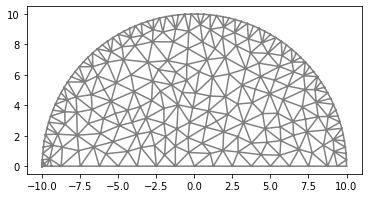

In [2]:
%%time
Rad = 10
#Ri = 1.
num_seg = 150

domain = Circle(Point(0., 0.), Rad, num_seg)
domain = (domain - Rectangle(Point(-Rad, -Rad), Point(Rad, 0.)))

mesh_res = 10
mesh = generate_mesh(domain, mesh_res)

plot(mesh)

In [3]:
# Definimos espacios funcionales
function_space = FunctionSpace(mesh, 'Lagrange', 1)

In [4]:
# Definimos funciones trial y test
u = TrialFunction(function_space)
v = TestFunction(function_space)

In [5]:
# Definimos condiciones de borde
def outer_boundary(x, on_boundary):
    x,y = x[0], x[1]
    return on_boundary and near(np.sqrt(x**2 + y**2), Rad, 5e-2)

def bottom_boundary(x, on_boundary):
    return on_boundary and near(x[1], 0.0, 5e-2)

In [6]:
# Inicializamos las condiciones de borde
outer_bc = DirichletBC(function_space, Constant(0), outer_boundary)
bottom_bc = DirichletBC(function_space, Constant(0), bottom_boundary)

boundaries = [outer_bc, bottom_bc]

In [7]:
%%time
# Definimos las partes del problema variacional
left_integrand = inner(nabla_grad(u), nabla_grad(v)) * dx

f =  Expression("x[0]*x[0] + x[1]*x[1]", degree=1)

right_integrand = f*v*dx

CPU times: user 1.86 ms, sys: 1.13 ms, total: 2.99 ms
Wall time: 3.53 ms


In [8]:
%%time
# Ensamblamos el problema de algebra lineal
# Ensamblamos la Matris A
A = assemble(left_integrand)

# Ensamblamos el vector b
b = assemble(right_integrand)

# Aplicamos las condiciones de borde
[bc.apply(A,b) for bc in boundaries]

# Creamos un placeholder para la  solucion
solution = Function(function_space) 

# Calculamos la solucion
solve(A, solution.vector(), b)

CPU times: user 8.89 ms, sys: 12 ms, total: 20.9 ms
Wall time: 55.5 ms


1

In [9]:
%%time
# Ahora pongamoslo en dos lineas :3
solution = Function(function_space)

solve(left_integrand == right_integrand, solution, boundaries)

CPU times: user 9.18 ms, sys: 0 ns, total: 9.18 ms
Wall time: 11.5 ms
Solving linear variational problem.


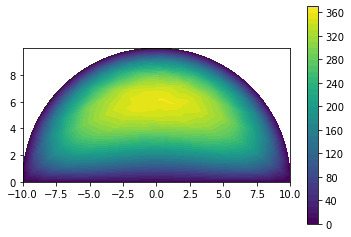

CPU times: user 183 ms, sys: 7.76 ms, total: 191 ms
Wall time: 185 ms


In [10]:
%%time
# Grafiquemos la solucion
p = plot(solution)
plt.colorbar(p)
plt.show()